In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [76]:
insurance_data=pd.read_csv('insurance.csv')
insurance_data.head()


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [77]:
insurance_data.shape

(1338, 7)

In [78]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [79]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [80]:
insurance_data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


C:\Users\VINAYAKA V NAYAK\AppData\Local\Temp\ipykernel_14304\2464519760.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['age'])


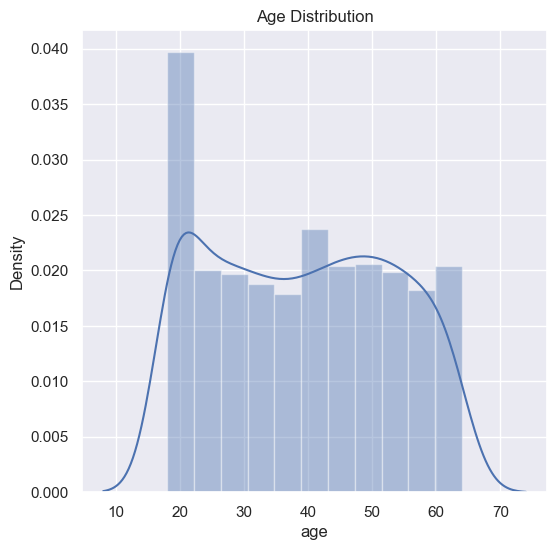

In [81]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['age'])
plt.title("Age Distribution")
plt.show()


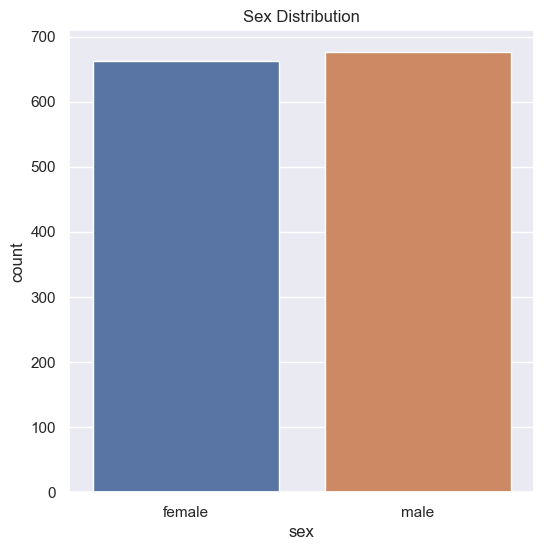

In [82]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_data)
plt.title("Sex Distribution")
plt.show()


In [83]:
insurance_data.value_counts()

age  sex     bmi   children  smoker  region     expenses
19   male    30.6  0         no      northwest  1639.56     2
47   male    29.8  3         yes     southwest  25309.49    1
48   female  25.9  3         yes     southeast  24180.93    1
             22.8  0         no      southwest  8269.04     1
47   male    47.5  1         no      southeast  8083.92     1
                                                           ..
31   female  25.7  0         no      southeast  3756.62     1
             23.6  2         no      southwest  4931.65     1
             21.8  0         no      northwest  4134.08     1
30   male    44.2  2         no      southeast  4266.17     1
64   male    40.5  0         no      southeast  13831.12    1
Name: count, Length: 1337, dtype: int64

C:\Users\VINAYAKA V NAYAK\AppData\Local\Temp\ipykernel_14304\2090411054.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['bmi'])


<function matplotlib.pyplot.show(close=None, block=None)>

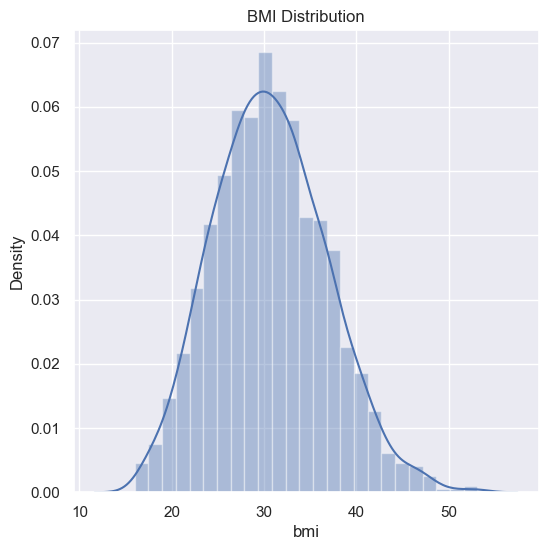

In [84]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['bmi'])
plt.title("BMI Distribution")
plt.show

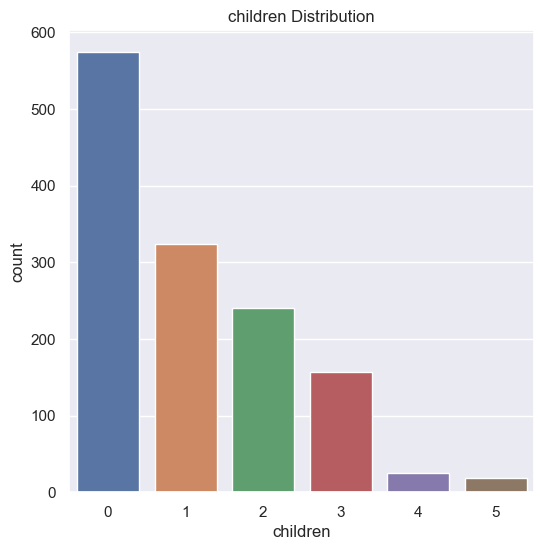

In [85]:
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_data)
plt.title("children Distribution")
plt.show()

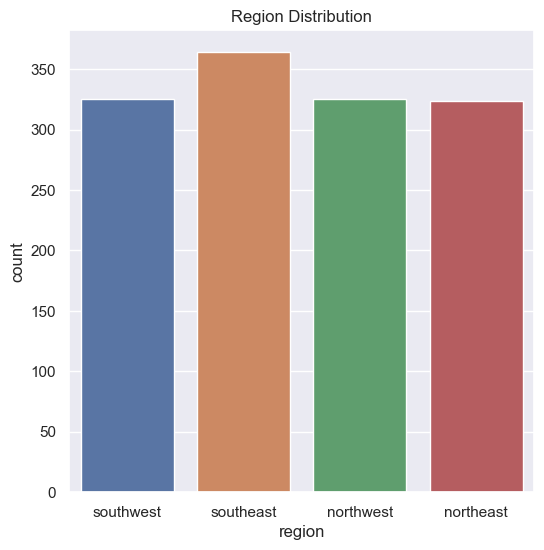

In [86]:
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_data)
plt.title("Region Distribution")
plt.show()

In [87]:
#encoding categorical data
insurance_data.replace({
    'sex':{'male':0,'female':1}
},inplace=True)

In [88]:
insurance_data.replace({
    'smoker':{'no':0,'yes':1}
},inplace=True)

In [89]:
insurance_data.replace({
    'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}
},inplace=True)

In [90]:
X=insurance_data.drop(columns='expenses',axis=1)
Y=insurance_data['expenses']

In [91]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [92]:
model=LinearRegression()
model.fit(X_train,Y_train)


LinearRegression()

In [93]:
training_prediction=model.predict(X_train)
#R squared value
r2_train=metrics.r2_score(Y_train,training_prediction)
print("R squared value:",r2_train)

R squared value: 0.7515233180624388


In [94]:
testing_prediction=model.predict(X_test)
#R squared value
r2_test=metrics.r2_score(Y_test,testing_prediction)
print("R squared value:",r2_test)

R squared value: 0.7447382074449773


In [97]:
input_data=(25,0,26.2,0,0,2)
input_as_array=np.asarray(input_data)
input_reshaped=input_as_array.reshape(1,-1)


In [98]:
prediction=model.predict(input_reshaped)
print("cost if insurance is:",prediction)

cost if insurance is: [2801.48424891]


d:\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
